<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/10%EC%9B%94%2031%EC%9D%BC/10%EC%9B%94_31%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:,['age','fare']]
df['ten'] = 10
df.head()

# 사용자 함수 정의
def add_10(n):
    return n + 10

def add_two_obj(a,b):
    return a + b

# 시리즈 객체에서 적용
sr1 = df['age'].apply(add_10)  # apply -> 함수를 매핑해주는 역할
sr1.head()

# 시리즈 객체와 숫자에 적용 : 2개의 인수(시리즈 + 숫자)
sr2 = df['age'].apply(add_two_obj, b=10)
sr2.head()

# 람다 함수 활용: 시리즈 객체에 적용
sr3 = df['age'].apply(lambda x: add_10(x))
sr3.head()

0    32.0
1    48.0
2    36.0
3    45.0
4    45.0
Name: age, dtype: float64

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

# deck 열의 NaN 개수 계산하기
# nan_deck = df['deck'].value_counts(dropna=False)  -> NaN의 값까지 모두 포함하여 출력해줌
nan_deck = df['deck'].value_counts()
nan_deck

df.head().isnull()
df.head().notnull()
df.head().isnull().sum(axis=0)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
for col in missing_df:
    missing_count = missing_df[col].value_counts()  # 각 열의 NaN 개수 파악
    try:
        print(col, ': ', missing_count[True])  # NaN 값이 있으면 개수 출력
    except:
        print(col, ': ',0)  # 없으면 0 출력

# NaN 값이 500개 이상인 열을 모두 삭제 - deck 열(891개 중 688개의 NaN 값)
df_thresh = df.dropna(axis=1,thresh=500)
df_thresh.columns

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
df_age = df.dropna(subset=['age'], how='any', axis=0)  # how='any' --> 모든 데이터 중 ~ 가 하나라도 있는 경 / how='all' --> 모든 데이터가 ~ 인 경
print(len(df_age))

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0
714


In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')

print(df['embark_town'][825:830])
print('\n')

# embark_town 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most = df['embark_town'].value_counts().idxmax()
print(most)
print('\n')

df['embark_town'].fillna(most,inplace=True)

# embark_town 열 829행의 NaN 데이터 출력 (NaN 값이 most_freq 값으로 대체)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object


Southampton


825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [ ]:
import pandas as pd
data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

data_dropna = data.dropna()

data_dropna

,A,B,C
2,3.0,6.0,9.0


In [ ]:
import pandas as pd
data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

data_dropna = data.dropna()

data_dropna

data_dropna

,A,B,C
2,3.0,6.0,9.0


In [ ]:
import pandas as pd
data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

# 결측치를 평균값으로 대체
data.fillna(data.mean(),inplace=True)

# 결과 출력
data

,A,B,C
0,1.0,4.000000,9.0
1,2.0,5.666667,8.0
2,3.0,6.000000,9.0
3,2.0,7.000000,10.0


In [ ]:
import pandas as pd
data = pd.DataFrame({'A':[1,2,3,None], 'B':[4, None, 6,7], 'C':[None,8,9,10]})

data_fillna = data.fillna(data.mode().iloc[0])

# 결과 출력
data_fillna

,A,B,C
0,1.0,4.0,8.0
1,2.0,4.0,8.0
2,3.0,6.0,9.0
3,1.0,7.0,10.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7c0b33dfbbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0b31a37490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0b31a34100>,
 'medians': [<matplotlib.lines.Line2D at 0x7c0b31a34730>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c0b31a35b40>,
 'means': []}

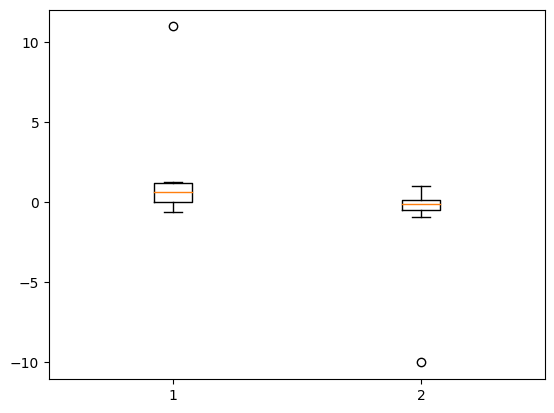

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randn(8,3), columns=['C1','C2','C3'])
df.loc[1,'C1'] = 11
df.loc[3,'C3'] = -10

plt.boxplot([df['C1'],df['C3']])

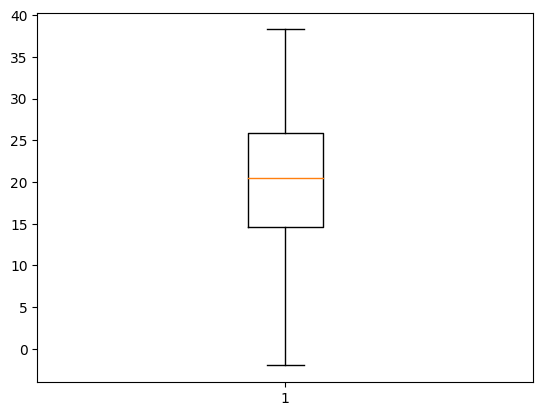

,dt,AverageTemperature,City,Latitude,Longitude,Year,Month,Day
0,1849-01-01,26.704,Abidjan,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,Abidjan,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,Abidjan,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,Abidjan,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,Abidjan,5.63N,3.23W,1849,5,1


In [ ]:
# city.csv 파일을 이용한 데이터 전처리 실습
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/city.csv')

# dt 컬럼의 데이터타입을 datetime으로 변경
df['dt'] = pd.to_datetime(df['dt'])
df.dtypes
# City 컬럼의 결측값을 해당 컬럼의 최빈값으로 대체하세요.
df['City'] = df['City'].fillna(df['City'].mode().iloc[0])
# AverageTemperature 컬럼의 결측값을 해당 컬럼의 평균값으로 대체
df['AverageTemperature'] = df['AverageTemperature'].fillna(df['AverageTemperature'].mean())
# AverageTemperature 컬럼에서 boxplot 사용하여 이상치 제거
# plt.boxplot(df['AverageTemperature'])
df = df[df.AverageTemperature>=-2]
plt.boxplot(df['AverageTemperature'])
plt.show()
# year, month, day 컬럼 추가
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month
df['Day'] = df['dt'].dt.day
df.head()